<a href="https://colab.research.google.com/github/praveenjune17/Neural-Machine-Translation-English-Tamil-model/blob/master/En2Ta_using_transformer_present.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

## Features 

Not have experience Out off vocab issue still since it uses subword encoding tech

## Read transformer
## Read BERT
## Run the prediction task for BERT seperately
## Train with the model with the BERT model

In [1]:
!pip install tf-nightly-gpu
!pip install tensorflow-gpu==2.0.0-beta1 


from __future__ import absolute_import, division, print_function, unicode_literals

import os
from google.colab import drive


if not os.path.exists('drive'):
  drive.mount('/content/drive')

     |████████████████████████████████| 406.6MB 69kB/s 
     |████████████████████████████████| 4.1MB 41.7MB/s 
     |████████████████████████████████| 61kB 22.7MB/s 
     |████████████████████████████████| 501kB 40.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/51/3e/a3/b351fae0cbf15373c2136a54a70f43fea5fe91d8168a5faaa4
Successfully built opt-einsum
     |████████████████████████████████| 348.9MB 53.3MB/s 
     |████████████████████████████████| 3.1MB 41.5MB/s 
     |████████████████████████████████| 501kB 47.0MB/s 
ERROR: tf-nightly-gpu 1.15.0.dev20190729 has requirement tb-nightly<1.16.0a0,>=1.15.0a0, but you'll have tb-nightly 1.14.0a20190603 which is incompatible.
  Found existing installation: tb-nightly 1.15.0a20190729
    Uninstalling tb-nightly-1.15.0a20190729:
      Successfully uninstalled tb-nightly-1.15.0a20190729
  Found existing installation: tf-estimator-nightly 1.14.0.dev2019072901
    Uninstalling tf-estimator-nightly-1.14.0.dev2019072901:
      Successfully un



## Patch to add eng_tam_parallel text to tensorflow datasets


In [2]:
import os
from collections import defaultdict
import shutil
from math import log

if not os.path.exists('datasets'):
  !git clone https://github.com/tensorflow/datasets
if not os.path.exists('Neural-Machine-Translation-English-Tamil-model'):
  !git clone https://github.com/praveenjune17/Neural-Machine-Translation-English-Tamil-model
  !unzip Neural-Machine-Translation-English-Tamil-model/Transformer_en_tam.zip

!python datasets/tensorflow_datasets/scripts/create_new_dataset.py \
  --dataset en_tam_parallel_text \
  --type translate

Cloning into 'datasets'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11822 (delta 4), reused 5 (delta 0), pack-reused 11813
Receiving objects: 100% (11822/11822), 81.16 MiB | 29.73 MiB/s, done.
Resolving deltas: 100% (8390/8390), done.
Cloning into 'Neural-Machine-Translation-English-Tamil-model'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 252 (delta 17), reused 0 (delta 0), pack-reused 215
Receiving objects: 100% (252/252), 119.75 MiB | 11.12 MiB/s, done.
Resolving deltas: 100% (125/125), done.
Archive:  Neural-Machine-Translation-English-Tamil-model/Transformer_en_tam.zip
  inflating: en_tam_parallel_text.py  
  inflating: en_tam_parallel_text.txt  
  inflating: en_tam_parallel_text_test.py  
Dataset generated in /usr/local/lib/python3.6/dist-packages/tensorflow_datasets
You can 

In [0]:
#Copy the patch and then import tfds
path = '/usr/local/lib/python3.6/dist-packages/tensorflow_datasets'
shutil.copy('../content/en_tam_parallel_text.py', os.path.join(path, 'translate/en_tam_parallel_text.py'))
shutil.copy('../content/en_tam_parallel_text_test.py', os.path.join(path, 'translate/en_tam_parallel_text_test.py'))
shutil.copy('../content/en_tam_parallel_text.txt', os.path.join(path, 'url_checksums/en_tam_parallel_text.txt'))


import tensorflow_datasets as tfds
import tensorflow as tf
import time
import numpy as np
import matplotlib.pyplot as plt


## Setup input pipeline

Create a custom subwords tokenizer from the training dataset. 

In [5]:
en_tam_ds = defaultdict(list)
#List of available datasets in the package
names = ['GNOME_v1_en_to_ta', 'GNOME_v1_en_AU_to_ta', 'GNOME_v1_en_CA_to_ta', 
         'GNOME_v1_en_GB_to_ta', 'GNOME_v1_en_US_to_ta', 'KDE4_v2_en_to_ta', 
         'KDE4_v2_en_GB_to_ta', 'Tatoeba_v20190709_en_to_ta', 'Ubuntu_v14.10_en_to_ta_LK', 
         'Ubuntu_v14.10_en_GB_to_ta_LK', 'Ubuntu_v14.10_en_AU_to_ta_LK', 'Ubuntu_v14.10_en_CA_to_ta_LK', 
         'Ubuntu_v14.10_en_US_to_ta_LK', 'Ubuntu_v14.10_en_to_ta', 'Ubuntu_v14.10_en_GB_to_ta', 
         'Ubuntu_v14.10_en_AU_to_ta', 'Ubuntu_v14.10_en_CA_to_ta', 'Ubuntu_v14.10_en_NZ_to_ta', 
         'Ubuntu_v14.10_en_US_to_ta', 'OpenSubtitles_v2018_en_to_ta', 'OpenSubtitles_v2016_en_to_ta',
         'en_ta']

for name in names:
  en_tam_ds[(name,'metadata_'+name)] = tfds.load('en_tam_parallel_text/'+name, 
                                           with_info=True, as_supervised=True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:00:40.596999 139787980261248 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


W0730 05:00:40.840541 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:00:40.843263 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:00:48.515064 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/GNOME_v1_en_to_ta/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:00:54.639931 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:00:54.642115 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:01:00.065933 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/GNOME_v1_en_AU_to_ta/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:01:05.191168 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:01:05.195615 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:01:09.451710 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/GNOME_v1_en_CA_to_ta/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:01:20.769268 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:01:20.771316 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:01:32.351986 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/GNOME_v1_en_GB_to_ta/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:01:34.368584 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:01:34.370702 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:01:35.364041 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/GNOME_v1_en_US_to_ta/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:02:00.597040 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:02:00.599223 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:02:26.438261 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/KDE4_v2_en_to_ta/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:02:52.620796 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:02:52.622783 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:03:19.877033 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/KDE4_v2_en_GB_to_ta/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:03:21.225189 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:03:21.226991 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:03:21.426717 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/Tatoeba_v20190709_en_to_ta/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:03:25.859235 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:03:25.861192 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:03:29.563378 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/Ubuntu_v14.10_en_to_ta_LK/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:03:34.056822 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:03:34.059171 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:03:37.734857 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/Ubuntu_v14.10_en_GB_to_ta_LK/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:03:42.289097 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:03:42.291764 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:03:45.977037 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/Ubuntu_v14.10_en_AU_to_ta_LK/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:03:49.969883 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:03:49.973359 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:03:53.126012 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/Ubuntu_v14.10_en_CA_to_ta_LK/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:03:54.405920 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:03:54.408293 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:03:54.544559 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/Ubuntu_v14.10_en_US_to_ta_LK/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:03:56.960867 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:03:56.962507 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:03:58.289087 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/Ubuntu_v14.10_en_to_ta/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:04:00.853897 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:04:00.856596 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:04:02.190926 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/Ubuntu_v14.10_en_GB_to_ta/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:04:04.629885 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:04:04.631945 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:04:05.950963 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/Ubuntu_v14.10_en_AU_to_ta/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:04:08.056345 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:04:08.058971 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:04:09.109497 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/Ubuntu_v14.10_en_CA_to_ta/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:04:10.306700 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:04:10.308651 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:04:10.442082 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/Ubuntu_v14.10_en_NZ_to_ta/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:04:11.671234 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:04:11.674357 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:04:11.854371 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/Ubuntu_v14.10_en_US_to_ta/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:04:22.270011 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:04:22.271777 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:04:32.249744 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/OpenSubtitles_v2018_en_to_ta/0.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0730 05:04:39.484830 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:04:39.486912 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:04:46.458177 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/OpenSubtitles_v2016_en_to_ta/0.0.1. Subsequent calls will reuse this data.


W0730 05:05:40.854996 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:05:41.492712 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0730 05:05:41.494418 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:06:35.163737 139787980261248 dataset_builder.py:831] Statistics not present in the dataset. TFDS is not able to load the total number of examples, so using the subsplit API may not provide precise subsplits.


W0730 05:06:35.643489 139787980261248 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.



Dataset en_tam_parallel_text downloaded and prepared to /root/tensorflow_datasets/en_tam_parallel_text/en_ta/0.0.1. Subsequent calls will reuse this data.


## Hyper parameters tagged as \#Hyp


### Load the old vocab file from G-drive if available else create.

Note :- default vocab size is assumed to be 2^13, so if want to change it then don't load the file from G-drive

In [0]:
count = 534778 #train data line count
en_vocab_path = '../content/drive/My Drive/Neural_machine_translation/Transformer_model/vocab_en_'+str(count)
ta_vocab_path = '../content/drive/My Drive/Neural_machine_translation/Transformer_model/vocab_ta_'+str(count)
tokenizer_en = tfds.features.text.SubwordTextEncoder.load_from_file(en_vocab_path)
tokenizer_ta = tfds.features.text.SubwordTextEncoder.load_from_file(ta_vocab_path)

## Goal


a) Try to get a subset of the datset for checking the training process

In [0]:
#BUFFER_SIZE = 20000
#BATCH_SIZE = 64 * 4
MAX_LENGTH = 50                  #drop examples of len 40 tokens
train_from_scratch = False
if not train_from_scratch:
  new_folder_name = '28julyaft'     

Add a start and end token to the input and target. 

In [0]:
def encode(lang1, lang2):
  lang1 = [tokenizer_en.vocab_size] + tokenizer_en.encode(
      lang1.numpy()) + [tokenizer_en.vocab_size+1]

  lang2 = [tokenizer_ta.vocab_size] + tokenizer_ta.encode(
      lang2.numpy()) + [tokenizer_ta.vocab_size+1]
  #print(len(lang1),len(lang2))
  
  return lang1, lang2

In [0]:
def filter_max_length(x, y, max_length=MAX_LENGTH):
  
  return tf.logical_and(tf.size(x) <= max_length,
                        tf.size(y) <= max_length)

Operations inside `.map()` run in graph mode and receive a graph tensor that do not have a numpy attribute. The `tokenizer` expects a string or Unicode symbol to encode it into integers. Hence, you need to run the encoding inside a `tf.py_function`, which receives an eager tensor having a numpy attribute that contains the string value.

In [0]:
def tf_encode(en, ta):
  return tf.py_function(encode, [en, ta], [tf.int64, tf.int64])

## Positional encoding

Since this model doesn't contain any recurrence or convolution, positional encoding is added to give the model some information about the relative position of the words in the sentence. 

The positional encoding vector is added to the embedding vector. Embeddings represent a token in a d-dimensional space where tokens with similar meaning will be closer to each other. But the embeddings do not encode the relative position of words in a sentence. So after adding the positional encoding, words will be closer to each other based on the *similarity of their meaning and their position in the sentence*, in the d-dimensional space.

See the notebook on [positional encoding](https://github.com/tensorflow/examples/blob/master/community/en/position_encoding.ipynb) to learn more about it. The formula for calculating the positional encoding is as follows:

$$\Large{PE_{(pos, 2i)} = sin(pos / 10000^{2i / d_{model}})} $$
$$\Large{PE_{(pos, 2i+1)} = cos(pos / 10000^{2i / d_{model}})} $$

In [0]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [0]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  sines = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  cosines = np.cos(angle_rads[:, 1::2])
  
  pos_encoding = np.concatenate([sines, cosines], axis=-1)
  
  pos_encoding = pos_encoding[np.newaxis, ...]
    
  return tf.cast(pos_encoding, dtype=tf.float32)

## Masking

Mask all the pad tokens in the batch of sequence. It ensures that the model does not treat padding as the input. The mask indicates where pad value `0` is present: it outputs a `1` at those locations, and a `0` otherwise.

In [0]:
def create_padding_mask(seq):
  seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
  
  # add extra dimensions so that we can add the padding
  # to the attention logits.
  return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [0]:
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  # (seq_len, seq_len)

## Scaled dot product attention

<img src="https://www.tensorflow.org/images/tutorials/transformer/scaled_attention.png" width="500" alt="scaled_dot_product_attention">

The attention function used by the transformer takes three inputs: Q (query), K (key), V (value). The equation used to calculate the attention weights is:

$$\Large{Attention(Q, K, V) = softmax_k(\frac{QK^T}{\sqrt{d_k}}) V} $$

The dot-product attention is scaled by a factor of square root of the depth. This is done because for large values of depth, the dot product grows large in magnitude pushing the softmax function where it has small gradients resulting in a very hard softmax. 

For example, consider that `Q` and `K` have a mean of 0 and variance of 1. Their matrix multiplication will have a mean of 0 and variance of `dk`. Hence, *square root of `dk`* is used for scaling (and not any other number) because the matmul of `Q` and `K` should have a mean of 0 and variance of 1, so that we get a gentler softmax.

The mask is multiplied with -1e9 (close to negative infinity). This is done because the mask is summed with the scaled matrix multiplication of Q and K and is applied immediately before a softmax. The goal is to zero out these cells, and large negative inputs to softmax are near zero in the output.

In [0]:
def scaled_dot_product_attention(q, k, v, mask):
  """Calculate the attention weights.
  q, k, v must have matching leading dimensions.
  k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
  The mask has different shapes depending on its type(padding or look ahead) 
  but it must be broadcastable for addition.
  
  Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable 
          to (..., seq_len_q, seq_len_k). Defaults to None.
    
  Returns:
    output, attention_weights
  """

  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
  
  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # add the mask to the scaled tensor.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)  

  # softmax is normalized on the last axis (seq_len_k) so that the scores
  # add up to 1.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

As the softmax normalization is done on K, its values decide the amount of importance given to Q.

The output represents the multiplication of the attention weights and the V (value) vector. This ensures that the words we want to focus on are kept as is and the irrelevant words are flushed out.

In [0]:
def print_out(q, k, v):
  temp_out, temp_attn = scaled_dot_product_attention(
      q, k, v, None)
  print ('Attention weights are:')
  print (temp_attn)
  print ('Output is:')
  print (temp_out)

## Multi-head attention

<img src="https://www.tensorflow.org/images/tutorials/transformer/multi_head_attention.png" width="500" alt="multi-head attention">


Multi-head attention consists of four parts:
*    Linear layers and split into heads.
*    Scaled dot-product attention.
*    Concatenation of heads.
*    Final linear layer.

Each multi-head attention block gets three inputs; Q (query), K (key), V (value). These are put through linear (Dense) layers and split up into multiple heads. 

The `scaled_dot_product_attention` defined above is applied to each head (broadcasted for efficiency). An appropriate mask must be used in the attention step.  The attention output for each head is then concatenated (using `tf.transpose`, and `tf.reshape`) and put through a final `Dense` layer.

Instead of one single attention head, Q, K, and V are split into multiple heads because it allows the model to jointly attend to information at different positions from different representational spaces. After the split each head has a reduced dimensionality, so the total computation cost is the same as a single head attention with full dimensionality.

In [0]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model
    
    assert d_model % self.num_heads == 0
    
    self.depth = d_model // self.num_heads
    
    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)
    
    self.dense = tf.keras.layers.Dense(d_model)
        
  def split_heads(self, x, batch_size):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])
    
  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]
    
    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)
    
    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)
    
    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)
    
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

    concat_attention = tf.reshape(scaled_attention, 
                                  (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)
        
    return output, attention_weights

Create a `MultiHeadAttention` layer to try out. At each location in the sequence, `y`, the `MultiHeadAttention` runs all 8 attention heads across all other locations in the sequence, returning a new vector of the same length at each location.

## Point wise feed forward network

Point wise feed forward network consists of two fully-connected layers with a ReLU activation in between.

In [0]:
def point_wise_feed_forward_network(d_model, dff):
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

## Encoder and decoder

<img src="https://www.tensorflow.org/images/tutorials/transformer/transformer.png" width="600" alt="transformer">

The transformer model follows the same general pattern as a standard [sequence to sequence with attention model](nmt_with_attention.ipynb). 

* The input sentence is passed through `N` encoder layers that generates an output for each word/token in the sequence.
* The decoder attends on the encoder's output and its own input (self-attention) to predict the next word. 

### Encoder layer

Each encoder layer consists of sublayers:

1.   Multi-head attention (with padding mask) 
2.    Point wise feed forward networks. 

Each of these sublayers has a residual connection around it followed by a layer normalization. Residual connections help in avoiding the vanishing gradient problem in deep networks.

The output of each sublayer is `LayerNorm(x + Sublayer(x))`. The normalization is done on the `d_model` (last) axis. There are N encoder layers in the transformer.

In [0]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    
  def call(self, x, training, mask):

    attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
    attn_output = self.dropout1(attn_output, training=training)
    out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)
    
    ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
    ffn_output = self.dropout2(ffn_output, training=training)
    out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)
    
    return out2

### Decoder layer

Each decoder layer consists of sublayers:

1.   Masked multi-head attention (with look ahead mask and padding mask)
2.   Multi-head attention (with padding mask). V (value) and K (key) receive the *encoder output* as inputs. Q (query) receives the *output from the masked multi-head attention sublayer.*
3.   Point wise feed forward networks

Each of these sublayers has a residual connection around it followed by a layer normalization. The output of each sublayer is `LayerNorm(x + Sublayer(x))`. The normalization is done on the `d_model` (last) axis.

There are N decoder layers in the transformer.

As Q receives the output from decoder's first attention block, and K receives the encoder output, the attention weights represent the importance given to the decoder's input based on the encoder's output. In other words, the decoder predicts the next word by looking at the encoder output and self-attending to its own output. See the demonstration above in the scaled dot product attention section.

In [0]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(DecoderLayer, self).__init__()

    self.mha1 = MultiHeadAttention(d_model, num_heads)
    self.mha2 = MultiHeadAttention(d_model, num_heads)

    self.ffn = point_wise_feed_forward_network(d_model, dff)
 
    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):
    # enc_output.shape == (batch_size, input_seq_len, d_model)

    attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
    attn1 = self.dropout1(attn1, training=training)
    out1 = self.layernorm1(attn1 + x)
    
    attn2, attn_weights_block2 = self.mha2(
        enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
    attn2 = self.dropout2(attn2, training=training)
    out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)
    
    ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
    ffn_output = self.dropout3(ffn_output, training=training)
    out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)
    
    return out3, attn_weights_block1, attn_weights_block2

### Encoder

The `Encoder` consists of:
1.   Input Embedding
2.   Positional Encoding
3.   N encoder layers

The input is put through an embedding which is summed with the positional encoding. The output of this summation is the input to the encoder layers. The output of the encoder is the input to the decoder.

In [0]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               rate=0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    
    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(input_vocab_size, self.d_model)
    
    
    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
  
    self.dropout = tf.keras.layers.Dropout(rate)
        
  def call(self, x, training, mask):

    seq_len = tf.shape(x)[1]
    
    # adding embedding and position encoding.
    x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)
    
    for i in range(self.num_layers):
      x = self.enc_layers[i](x, training, mask)
    
    return x  # (batch_size, input_seq_len, d_model)

### Decoder

 The `Decoder` consists of:
1.   Output Embedding
2.   Positional Encoding
3.   N decoder layers

The target is put through an embedding which is summed with the positional encoding. The output of this summation is the input to the decoder layers. The output of the decoder is the input to the final linear layer.

In [0]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, 
               rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    
    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
    self.pos_encoding = positional_encoding(target_vocab_size, self.d_model)
    
    self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(rate)
    
  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):

    seq_len = tf.shape(x)[1]
    attention_weights = {}
    
    x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]
    
    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                             look_ahead_mask, padding_mask)
      
      attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
      attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
    # x.shape == (batch_size, target_seq_len, d_model)
    return x, attention_weights

## Create the Transformer

Transformer consists of the encoder, decoder and a final linear layer. The output of the decoder is the input to the linear layer and its output is returned.

In [0]:
class Transformer(tf.keras.Model):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               target_vocab_size, rate=0.1):
    super(Transformer, self).__init__()

    self.encoder = Encoder(num_layers, d_model, num_heads, dff, 
                           input_vocab_size, rate)

    self.decoder = Decoder(num_layers, d_model, num_heads, dff, 
                           target_vocab_size, rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
  def call(self, inp, tar, training, enc_padding_mask, 
           look_ahead_mask, dec_padding_mask):

    enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)
    
    # dec_output.shape == (batch_size, tar_seq_len, d_model)
    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, look_ahead_mask, dec_padding_mask)
    
    final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)
    
    return final_output, attention_weights

## Set hyperparameters

To keep this example small and relatively fast, the values for *num_layers, d_model, and dff* have been reduced. 

The values used in the base model of transformer were; *num_layers=6*, *d_model = 512*, *dff = 2048*. See the [paper](https://arxiv.org/abs/1706.03762) for all the other versions of the transformer.

Note: By changing the values below, you can get the model that achieved state of the art on many tasks.

In [27]:
num_layers = 4  #denoted as 'L' in BERT , no.of blocks
d_model = 256   #ll sub-layers in the model, as well as the embedding layers, produce outputs of dimension dmodel=512.
dff = 1024      #denoted as 'H' in BERT 
num_heads = 4   #denoted as 'A' in BERT


'''
BERT config
In all cases we set the feed-forward/filter size to be 4H,
i.e., 3072 for the H = 768 and 4096 for the H = 1024.
'''
input_vocab_size = tokenizer_en.vocab_size + 2
target_vocab_size = tokenizer_ta.vocab_size + 2
dropout_rate = 0.3

print('english vocab size is {} '.format(input_vocab_size))
print('tamil vocab size is {}'.format(target_vocab_size))


##Hyper parameter used in the First run 
# num_layers = 4
# d_model = 256
# dff = 1024  
# num_heads = 4

# input_vocab_size = tokenizer_ta.vocab_size + 2
# target_vocab_size = tokenizer_en.vocab_size + 2
# dropout_rate = 0.3
#'''
if not train_from_scratch:
  model_name = 'model_'+'_'.join((str(num_layers), str(d_model), str(dff), str(num_heads), str(input_vocab_size), str(target_vocab_size)))

english vocab size is 8264 
tamil vocab size is 8380


## Optimizer

Use the Adam optimizer with a custom learning rate scheduler according to the formula in the [paper](https://arxiv.org/abs/1706.03762).

$$\Large{lrate = d_{model}^{-0.5} * min(step{\_}num^{-0.5}, step{\_}num * warmup{\_}steps^{-1.5})}$$


In [0]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    
    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps
    
  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)
    
    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [0]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, 
                                     epsilon=1e-9)

Text(0.5, 0, 'Train Step')

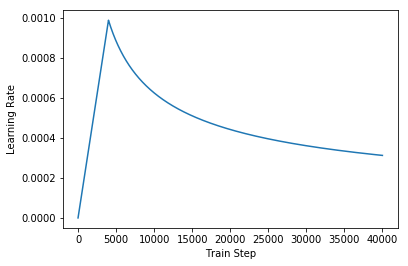

In [30]:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

## Loss and metrics

Since the target sequences are padded, it is important to apply a padding mask when calculating the loss.

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [0]:
def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask
  
  return tf.reduce_mean(loss_)

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
    name='train_accuracy')

## Training and checkpointing

In [0]:
transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size, dropout_rate)

In [0]:
def create_masks(inp, tar):
  # Encoder padding mask
  enc_padding_mask = create_padding_mask(inp)
  
  # Used in the 2nd attention block in the decoder.
  # This padding mask is used to mask the encoder outputs.
  dec_padding_mask = create_padding_mask(inp)
  
  # Used in the 1st attention block in the decoder.
  # It is used to pad and mask future tokens in the input received by 
  # the decoder.
  look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
  dec_target_padding_mask = create_padding_mask(tar)
  combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
  return enc_padding_mask, combined_mask, dec_padding_mask

Create the checkpoint path and the checkpoint manager. This will be used to save checkpoints every `n` epochs.

In [0]:
new_path = '../content/drive/My Drive/Neural_machine_translation/Transformer_model/checkpoints/'\
              +new_folder_name

if train_from_scratch == True:
  shutil.rmtree('../content/checkpoints')
  checkpoint_path = './checkpoints/train'
else:
  checkpoint_path = new_path +'/'+model_name

In [37]:
ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if (ckpt_manager.latest_checkpoint):
  ckpt.restore(ckpt_manager.latest_checkpoint).expect_partial()
  print ('Latest checkpoint restored is {} !!'.format(ckpt_manager.latest_checkpoint.split('/')[-1]))
  print ('size of the checkpoint directory is {}MB '.format(sum(os.path.getsize(os.path.join(checkpoint_path,f)) for f in os.listdir(checkpoint_path))/(1024*1024)))

Latest checkpoint restored is ckpt-148 !!
size of the checkpoint directory is 789.6208267211914MB 


The target is divided into tar_inp and tar_real. tar_inp is passed as an input to the decoder. `tar_real` is that same input shifted by 1: At each location in `tar_input`, `tar_real` contains the  next token that should be predicted.

For example, `sentence` = "SOS A lion in the jungle is sleeping EOS"

`tar_inp` =  "SOS A lion in the jungle is sleeping"

`tar_real` = "A lion in the jungle is sleeping EOS"

The transformer is an auto-regressive model: it makes predictions one part at a time, and uses its output so far to decide what to do next. 

During training this example uses teacher-forcing (like in the [text generation tutorial](./text_generation.ipynb)). Teacher forcing is passing the true output to the next time step regardless of what the model predicts at the current time step.

As the transformer predicts each word, *self-attention* allows it to look at the previous words in the input sequence to better predict the next word.

To prevent the model from peaking at the expected output the model uses a look-ahead mask.

## Evaluate

The following steps are used for evaluation:

* Encode the input sentence using the tamil3 tokenizer (`tokenizer_ta`). Moreover, add the start and end token so the input is equivalent to what the model is trained with. This is the encoder input.
* The decoder input is the `start token == tokenizer_en.vocab_size`.
* Calculate the padding masks and the look ahead masks.
* The `decoder` then outputs the predictions by looking at the `encoder output` and its own output (self-attention).
* Select the last word and calculate the argmax of that.
* Concatentate the predicted word to the decoder input as pass it to the decoder.
* In this approach, the decoder predicts the next word based on the previous words it predicted.

Note: The model used here has less capacity to keep the example relatively faster so the predictions maybe less right. To reproduce the results in the paper, use the entire dataset and base transformer model or transformer XL, by changing the hyperparameters above.

In [0]:

#visualize train loss and Validation loss in tensorboard (@batch % 50 == 0)
#Follow karpthy's suggestion
#Small transformer model and feed it with a small data and increase the complexity untill the loss reaches zero
#Shuffle the 500K records and select 50K for training and select the best model (dataset.take(count))
#BLEU score code as evaluation metric for validation set
#beam_search decoder (paper highlights)
#use BERT to intialize weights (paper highlights) and train using TPU
#Publish paper , go through the IIT paper and get the results of validation and test
#Transformers with beamsearch



In [0]:
#beam_search_decoder = np.vectorize(beam_search_decoder)

In [0]:
def evaluate(inp_sentence):
  start_token = [tokenizer_en.vocab_size]
  end_token = [tokenizer_en.vocab_size + 1]
  
  # inp sentence is tamil, hence adding the start and end token
  inp_sentence = start_token + tokenizer_en.encode(inp_sentence) + end_token
  encoder_input = tf.expand_dims(inp_sentence, 0)
  
  # as the target is tamil, the first word to the transformer should be the
  # tamil start token.
  decoder_input = [tokenizer_ta.vocab_size]
  output = tf.expand_dims(decoder_input, 0)
  data = []
  #beam_width = 3
  for i in range(MAX_LENGTH):
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(
        encoder_input, output)
  
    # predictions.shape == (batch_size, seq_len, vocab_size)
    predictions, attention_weights = transformer(encoder_input, 
                                                 output,
                                                 False,
                                                 enc_padding_mask,
                                                 combined_mask,
                                                 dec_padding_mask)
    
    # select the last word from the seq_len dimension
    predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)
    data.append(tf.nn.softmax(predictions, axis=-1).numpy())
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
    if tf.equal(predicted_id, tokenizer_ta.vocab_size+1):
      return data, attention_weights
    
    #concatentate the predicted_id to the output which is given to the decoder
    #as its input.
    output = tf.concat([output, predicted_id], axis=-1)

  return  data, attention_weights

In [0]:
# beam search
# from https://machinelearningmastery.com/beam-search-decoder-natural-language-processing/
def beam_search_decoder(data, beam_size):
	sequences = [[list(), 1.0]]
	# walk over each step in sequence
	for row in data:
		all_candidates = list()
		# expand each current candidate
		for i in range(len(sequences)):
			seq, score = sequences[i]
			for j in range(len(row)):
				candidate = [seq + [j], score * -log(row[j])]
				all_candidates.append(candidate)
		# order all candidates by score
		ordered = sorted(all_candidates, key=lambda tup:tup[1])
		# select k best
		sequences = ordered[:beam_size]
	return sequences

In [0]:
def plot_attention_weights(attention, sentence, result, layer):
  fig = plt.figure(figsize=(16, 8))
  
  sentence = tokenizer_ta.encode(sentence)
  
  attention = tf.squeeze(attention[layer], axis=0)
  
  for head in range(attention.shape[0]):
    ax = fig.add_subplot(2, 4, head+1)
    
    # plot the attention weights
    ax.matshow(attention[head][:-1, :], cmap='viridis')

    fontdict = {'fontsize': 10}
    
    ax.set_xticks(range(len(sentence)+2))
    ax.set_yticks(range(len(result)))
    
    ax.set_ylim(len(result)-1.5, -0.5)
        
    ax.set_xticklabels(
        ['<start>']+[tokenizer_en.decode([i]) for i in sentence]+['<end>'], 
        fontdict=fontdict, rotation=90)
    
    ax.set_yticklabels([tokenizer_ta.decode([i]) for i in result 
                        if i < tokenizer_ta.vocab_size], 
                       fontdict=fontdict)
    
    ax.set_xlabel('Head {}'.format(head+1))
  
  plt.tight_layout()
  plt.show()

In [0]:
def translate(sentence, beam_size,plot=''):
  data, attention_weights = evaluate(sentence)
  data=np.squeeze(np.asarray(data))
  
  if len(sentence.split()) >= 2 or (beam_size>1):
    bs_dec_op = beam_search_decoder(data, beam_size)
  elif (len(sentence.split()) <= 1) or (beam_size==1):
    bs_dec_op = beam_search_decoder(data, beam_size=1)  #greedy 
  
  print('Input: {}'.format(sentence))
  
  for count,seqs in enumerate(bs_dec_op):
    predicted_sentence = tokenizer_ta.decode([i for i in seqs[0] 
                                            if i < tokenizer_ta.vocab_size])
    if count==0:
      print('Predicted translation using greedy search: {}'.format(predicted_sentence))
    else:
      print('Predicted translation using beam search with size {}: {}'.format(count,predicted_sentence))
  
  if plot:
    plot_attention_weights(attention_weights, sentence, predicted_sentence, plot)

In [252]:
beam_size = 1
translate("I don't have an opinion.", beam_size=beam_size)
translate("replace it", beam_size=beam_size)
translate("You should capture some context", beam_size=beam_size)
translate('Will he plead against me with his great power', beam_size=beam_size)
translate("are you a fool?", beam_size=beam_size)
translate("follower", beam_size=beam_size)
translate("constituency change", beam_size=beam_size)
translate("Just Keep improving", beam_size=beam_size)

Input: I don't have an opinion.
Predicted translation using greedy search: பின்னர் அவர்கள் முடிவு செய்துவிட்டார்கள்
Input: replace it
Predicted translation using greedy search:  மேலெழுது
Input: You should capture some context
Predicted translation using greedy search: சில பாடல்கள் சில கால்ஷிங் செய்யப்படுகின்றன
Input: Will he plead against me with his great power
Predicted translation using greedy search: அவர் பின்னர் என்று திருமணம் செய்து விட்டார்
Input: are you a fool?
Predicted translation using greedy search: நீங்கள் ஒரு மனிதன் இருக்கிறீர்களா?
Input: follower
Predicted translation using greedy search: தொடர்ந்து
Input: constituency change
Predicted translation using greedy search: மாற்று குறிப்புகள்
Input: Just Keep improving
Predicted translation using greedy search: பின்னர் குற்றம் என்று பார்க்க வேண்டும்


In [97]:
translate("I don't have an opinion.")
print ("Google's translation: எனக்கு ஒரு கருத்து இல்லை .")
translate("replace it")
print ("Google's translation: அதை மாற்றவும்")
translate("You should capture some context")
print ("Google's translation: நீங்கள் சில சூழலைப் பிடிக்க வேண்டும்")
translate('Will he plead against me with his great power')
print ("Google's translation: அவர் தனது பெரும் சக்தியால் எனக்கு எதிராக மன்றாடுவாரா?")
translate("are you a fool?")
translate("follower")
translate("constituency change")
translate("Just Keep improving")

Input: I don't have an opinion.
Predicted translation: பின்னர் அவர்கள் முடிவு செய்துவிட்டார்கள்
Google's translation: எனக்கு ஒரு கருத்து இல்லை .
Input: replace it
Predicted translation:  மேலெழுது
Google's translation: அதை மாற்றவும்
Input: You should capture some context
Predicted translation: சில பாடல்கள் சில கால்ஷிங் செய்யப்படுகின்றன
Google's translation: நீங்கள் சில சூழலைப் பிடிக்க வேண்டும்
Input: Will he plead against me with his great power
Predicted translation: அவர் பின்னர் என்று திருமணம் செய்து விட்டார்
Google's translation: அவர் தனது பெரும் சக்தியால் எனக்கு எதிராக மன்றாடுவாரா?
Input: are you a fool?
Predicted translation: நீங்கள் ஒரு மனிதன் இருக்கிறீர்களா?
Input: follower
Predicted translation: தொடர்ந்து
Input: constituency change
Predicted translation: மாற்று குறிப்புகள்
Input: Just Keep improving
Predicted translation: பின்னர் குற்றம் என்று பார்க்க வேண்டும்


In [253]:
translate("who?")

Input: who?
Predicted translation using greedy search: யார்?


In [254]:
translate('date')

Input: date
Predicted translation using greedy search: தேதி


In [260]:
translate("sports",3)

Input: sports
Predicted translation using greedy search: விளைவுகள்
Predicted translation using beam search with size 1: வினைவுகள்
Predicted translation using beam search with size 2: விலைவுகள்
